In [1]:
import autoplier.model as ap
import csv
import json
import mygene
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import precision_score, recall_score, average_precision_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
import numpy as np
import os
import pandas as pd
import time

In [2]:
gtex = pd.read_csv("C:/Users/julia/Documents/GitHub/autoPLIER-analysis/data/GTEX/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct", skiprows = 2,sep = "\t" ,header = 0)

In [3]:
gtex = gtex.set_index("Name")
gtex = gtex.drop("Description", axis = 1)
gtex.head()

,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6,GTEX-1117F-2826-SM-5GZXL,GTEX-1117F-2926-SM-5GZYI,...,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.5,0.00000,0.000,0.000,0.00000,0.000,0.000,0.00,0.00000,0.00,0.00000,...,0.00000,0.03629,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.01965,0.02522
ENSG00000227232.5,8.76400,3.861,7.349,11.07000,3.306,5.389,11.99,16.95000,10.04,12.50000,...,1.60600,2.26800,5.38600,2.31,2.45600,4.0230,1.922,2.85700,0.86960,2.16700
ENSG00000278267.1,0.00000,0.000,1.004,0.00000,0.000,0.000,0.00,0.00000,0.00,0.00000,...,0.00000,0.00000,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.00000,0.00000
ENSG00000243485.5,0.07187,0.000,0.000,0.06761,0.000,0.000,0.00,0.00000,0.00,0.06265,...,0.00000,0.00000,0.06073,0.00,0.08464,0.1435,0.000,0.05216,0.00000,0.00000
ENSG00000237613.2,0.00000,0.000,0.000,0.00000,0.000,0.000,0.00,0.03904,0.00,0.00000,...,0.02429,0.00000,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.00000,0.00000


In [4]:
metadata = pd.read_csv("C:/Users/julia/Documents/GitHub/autoPLIER-analysis/data/GTEX/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt", sep = "\t", index_col = "SAMPID")

In [5]:
metadata

,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMUBRID,SMTSISCH,SMTSPAX,SMNABTCH,...,SME1ANTI,SMSPLTRD,SMBSMMRT,SME1SNSE,SME1PCTS,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS
SAMPID,,,,,,,,,,,,,,,,,,,,,
GTEX-1117F-0003-SM-58Q7G,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,BP-38516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0003-SM-5DWSB,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,BP-38516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0003-SM-6WBT7,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,BP-38516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0011-R10a-SM-AHZ7F,NaN,"B1, A1",NaN,NaN,Brain,Brain - Frontal Cortex (BA9),0009834,1193.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0011-R10b-SM-CYKQ8,NaN,"B1, A1",NaN,7.2,Brain,Brain - Frontal Cortex (BA9),0009834,1193.0,NaN,BP-42319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K-562-SM-E9EZC,NaN,NaN,NaN,NaN,Bone Marrow,Cells - Leukemia cell line (CML),EFO_0002067,NaN,NaN,BP-65884,...,26289400.0,27814300.0,0.002441,26121600.0,49.8400,0.006370,0.995167,NaN,0.0,50.2621
K-562-SM-E9EZI,NaN,NaN,NaN,NaN,Bone Marrow,Cells - Leukemia cell line (CML),EFO_0002067,NaN,NaN,BP-65884,...,26653800.0,28341700.0,0.002336,26553400.0,49.9056,0.006806,0.994802,NaN,0.0,50.2046
K-562-SM-E9EZO,NaN,NaN,NaN,NaN,Bone Marrow,Cells - Leukemia cell line (CML),EFO_0002067,NaN,NaN,BP-65884,...,14317500.0,15168000.0,0.001731,14163500.0,49.7298,0.006662,0.994935,NaN,0.0,50.2412


In [6]:
metadata["SMTS"].value_counts()

Blood              3480
Brain              3326
Skin               2014
Esophagus          1582
Blood Vessel       1473
Adipose Tissue     1327
Heart              1141
Muscle             1132
Lung                867
Colon               821
Thyroid             812
Nerve               722
Breast              480
Testis              406
Stomach             381
Pancreas            360
Pituitary           301
Adrenal Gland       275
Prostate            262
Spleen              260
Liver               251
Bone Marrow         217
Ovary               195
Small Intestine     193
Salivary Gland      181
Vagina              173
Uterus              166
Kidney              104
Bladder              21
Cervix Uteri         19
Fallopian Tube        9
Name: SMTS, dtype: int64

In [7]:
pathway_genes = []
pathway_names = []

with open('C:/Users/julia/Documents/GitHub/autoPLIER-analysis/data/GTEX/c2.all.v7.5.1.entrez.gmt', newline='\n') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    for row in reader:
        pathway_names += [row[0]]
        pathway_genes += [row[2:]]

mlb = MultiLabelBinarizer()
pathways = pd.DataFrame(mlb.fit_transform(pathway_genes), index = pathway_names, columns = mlb.classes_)

mg = mygene.MyGeneInfo()
genes = pathways.columns.tolist()
info = mg.getgenes(genes, fields="ensembl")

not_in_db = []
rename = {}
for x in info:
    if("ensembl" in x):
        y = x["ensembl"]
        if(type(y) == list):
            y = y[0]
        rename[x["query"]] = y["gene"]
    else:
        not_in_db += [x["query"]]

pathways = pathways.drop(columns = not_in_db)
pathways = pathways.rename(columns=rename)
pathways = pathways.groupby(level = 0, axis = 1).first()
pathways

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-21728...done.


,126231,55872,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,...,ENSG00000291173,ENSG00000291177,ENSG00000291190,ENSG00000291205,ENSG00000291207,ENSG00000291237,ENSG00000291266,ENSG00000291280,ENSG00000291287,ENSG00000291300
CORONEL_RFX7_DIRECT_TARGETS_UP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOROUTAN_TGFB_EMT_UP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOROUTAN_TGFB_EMT_DN,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
FOROUTAN_PRODRANK_TGFB_EMT_UP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOROUTAN_PRODRANK_TGFB_EMT_DN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SA_MMP_CYTOKINE_CONNECTION,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SA_PROGRAMMED_CELL_DEATH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SA_PTEN_PATHWAY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SA_REG_CASCADE_OF_CYCLIN_EXPR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
gtex.index = [i.split(".")[0] for i in gtex.index.tolist()]
gtex = gtex[gtex.index.isin(pathways.columns)]
gtex = gtex[~gtex.index.duplicated(keep='first')]
gtex = gtex + 1
gtex = gtex.transform(lambda x: np.log(x))

In [9]:
pathways = pathways.T[pathways.columns.isin(gtex.index)].T

In [10]:
# Autoplier callbacks
callbacks = [
        #early stopping - to mitigate overfitting
        EarlyStopping(patience=100, monitor='val_loss'),
        #monitor umatrix sparsity
        ]

In [11]:
def train_autoplier(X_train,X_test, pathways, seed, n_LVs, regval = 1.20E-7 ):
    ap.set_seed_(seed)
    model = ap.autoPLIER(n_LVs, regval = regval,learning_rate= 0.000156)
    model.fit(X_train, pathways, verbose=0, batch_size = None, callbacks = callbacks)
    Z_test = model.transform(X_test, pathways)
    Z_train = model.transform(X_train, pathways)
    print(ap.sparsity_epsilon(model.components_decomposition_, 0))
    
    return Z_train, Z_test

In [12]:
metadata = metadata[metadata.index.isin(gtex.columns)]

In [13]:
tissue_types = metadata["SMTS"].unique()

In [14]:
metadata["SMTS"]

SAMPID
GTEX-1117F-0226-SM-5GZZ7    Adipose Tissue
GTEX-1117F-0426-SM-5EGHI            Muscle
GTEX-1117F-0526-SM-5EGHJ      Blood Vessel
GTEX-1117F-0626-SM-5N9CS      Blood Vessel
GTEX-1117F-0726-SM-5GIEN             Heart
                                 ...      
GTEX-ZZPU-2126-SM-5EGIU              Ovary
GTEX-ZZPU-2226-SM-5EGIV             Vagina
GTEX-ZZPU-2426-SM-5E44I       Blood Vessel
GTEX-ZZPU-2626-SM-5E45Y             Muscle
GTEX-ZZPU-2726-SM-5NQ8O     Adipose Tissue
Name: SMTS, Length: 17382, dtype: object

In [15]:
X_train, X_test, y_train, y_test = train_test_split(gtex.T, metadata["SMTS"], test_size=0.33, random_state=111)

In [16]:
def train_classifiers(train_target_full, test_target_full, train_data, test_data):
    
    test_precision = []
    test_recall = []
    aps = []
    fscores = []
    successful_celltypes = []
    unsuccessful_celltypes = []
    for tissue_type in tissue_types:
        
        
        
        train_target = train_target_full == str(tissue_type)
        test_target = test_target_full == str(tissue_type)
        
        
        if(1 in train_target.values and 1 in test_target.values and 0 in train_target.values and 0 in test_target.values):
        # lasso penalty

            clf = LogisticRegression(solver = "liblinear",penalty = "l2",random_state=111, max_iter = 1000)

            clf.fit(train_data, train_target)
            target_pred = clf.predict(test_data)
            target_probs = clf.predict_proba(test_data)[:,1]
            test_pr = average_precision_score(test_target, target_probs)
            test_precision += [precision_score(test_target, target_pred)]
            test_recall += [recall_score(test_target, target_pred)]
            aps += [average_precision_score(test_target, target_probs)]
            fscores += [fscore(test_precision[-1], test_recall[-1])]
            
            
            successful_celltypes += [tissue_type]
        else:
            unsuccessful_celltypes += [tissue_type]

    p = np.mean(test_precision)
    r = np.mean(test_recall)
    f= np.mean(fscores)
    f_micro = fscore(p, r) 
    ap = np.mean(aps)
    sd_f = np.std(f)
    sd_ap = np.std(aps)
    report = pd.DataFrame(list(zip(test_precision, test_recall, aps, fscores)), columns = ["precision",
             "recall","Average Precision","F1 score"], index = successful_celltypes)
    return(report)

In [17]:
# fscore metric used to evaluate classifiers
def fscore(p, r):
    denom = p + r or 1

    return 2*(p * r) / denom

In [18]:
X_train

,ENSG00000186092,ENSG00000228794,ENSG00000230368,ENSG00000234711,ENSG00000223764,ENSG00000187634,ENSG00000188976,ENSG00000187961,ENSG00000187583,ENSG00000187642,...,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,ENSG00000198886,ENSG00000210184,ENSG00000198786,ENSG00000198695,ENSG00000198727
GTEX-14E6D-1026-SM-5S2RS,0.000000,2.237727,0.526915,0.513961,1.781036,1.427436,4.063370,3.049747,1.060910,0.663152,...,9.457279,9.938420,9.850140,9.185843,8.815964,9.649305,0.000000,8.133294,7.638680,9.237080
GTEX-146FR-1826-SM-5QGPF,0.205875,1.892509,0.260208,0.494574,0.618478,0.598287,3.810655,2.526528,0.528744,0.212285,...,10.236776,10.722188,10.539562,10.177742,9.836867,10.592150,0.465493,8.976389,9.173780,10.379442
GTEX-1HCU8-0726-SM-ADEIR,0.140979,1.799893,0.024322,0.000000,0.371839,0.216079,4.082778,2.127398,0.702107,0.166869,...,10.172789,10.635639,10.795096,9.876168,10.077063,10.738373,0.000000,8.296796,7.988543,10.213946
GTEX-13X6I-0011-R10a-SM-5PNWI,0.419368,2.255703,0.127073,0.144533,0.187806,0.379053,3.762594,2.117339,0.106250,0.372184,...,10.241780,10.794891,10.869730,9.824498,10.002020,10.608341,0.432042,8.992060,8.925321,10.260847
GTEX-RU72-1226-SM-2TF6N,0.067565,2.796061,0.086985,0.210828,3.427515,3.014554,4.209309,2.129303,0.681833,1.355835,...,9.689118,10.118639,10.060534,9.122711,9.379323,10.273705,0.736207,9.118115,9.511259,9.642188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-1CB4H-0126-SM-7IGN2,0.000000,1.741693,0.042101,0.036351,0.847155,0.736207,4.238878,3.162517,1.026042,0.310348,...,9.561772,10.102379,10.414243,9.651880,9.099967,9.968385,0.000000,7.768110,7.297768,9.428753
GTEX-14AS3-1026-SM-5TDD7,0.047923,2.384534,0.031421,0.198687,1.080788,1.946767,4.212572,3.103689,0.234360,0.153751,...,9.738082,10.351405,10.295563,9.573663,9.667829,10.458263,0.567471,8.641532,8.793157,10.088763
GTEX-14PJ6-1226-SM-6LLHJ,0.129448,2.146516,0.058184,0.000000,1.081466,0.782073,3.921577,2.369683,0.527034,0.251537,...,9.289244,9.738672,9.785886,9.538996,8.718337,9.488048,0.540520,8.650675,9.245804,9.392745
GTEX-1J8Q3-0126-SM-C1YSI,0.000000,1.948478,0.065666,0.256346,3.132882,2.626840,4.208268,3.232384,1.270884,0.517364,...,9.636327,10.105244,10.205479,9.124456,9.344084,10.160491,0.594486,8.491670,8.715880,9.660843


In [19]:
gtex

,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6,GTEX-1117F-2826-SM-5GZXL,GTEX-1117F-2926-SM-5GZYI,...,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
ENSG00000186092,0.000000,0.097580,0.071707,0.000000,0.041459,0.054573,0.160672,0.000000,0.000000,0.057419,...,0.121332,0.128129,0.055709,0.119470,0.113150,0.065479,0.107508,0.000000,0.138021,0.000000
ENSG00000228794,2.026304,1.915304,2.382135,2.270785,2.358304,1.559197,2.233878,1.688619,1.849557,1.487496,...,2.880321,1.836573,1.940036,1.589235,2.401525,1.911910,1.271164,2.576422,2.220507,2.624669
ENSG00000230368,0.124163,0.154094,0.047198,0.079670,0.053579,0.070393,0.055104,0.431263,0.032487,0.175716,...,0.061020,0.064523,0.170755,0.000000,0.074978,0.123986,0.104990,0.253013,0.175968,0.088606
ENSG00000234711,0.205143,0.000000,0.154008,0.068966,0.132956,0.172608,0.093090,0.457615,0.157516,0.064063,...,0.134968,0.073724,0.120712,0.000000,0.043720,0.000000,0.061594,0.199097,0.153322,0.147989
ENSG00000223764,0.566279,0.291699,0.580034,2.430978,2.057452,0.636418,2.951780,1.071241,0.472625,0.145139,...,2.018098,1.801545,1.315335,1.249615,0.852712,0.458311,0.371633,2.464704,0.136888,0.145830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198886,9.425532,10.435027,9.533944,9.391912,11.146936,10.374147,9.335298,9.306650,10.447003,9.753885,...,10.531856,10.707975,10.738807,10.763229,10.694238,10.363788,10.048064,9.717218,10.599157,10.304643
ENSG00000210184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.856965,0.960499,0.582327,0.652065,...,1.101275,0.426378,0.637317,0.840273,1.051870,0.719302,0.000000,0.568491,1.194831,0.000000
ENSG00000198786,7.982416,9.249657,8.405591,7.121252,8.959440,7.855157,7.183871,7.527256,7.956477,7.921173,...,9.930178,8.756525,9.292934,9.428753,9.550449,8.377011,7.963112,9.117348,9.607841,9.030855
ENSG00000198695,8.242756,9.599066,8.814182,6.707229,8.861067,7.527256,6.948897,7.217443,7.454141,8.268475,...,10.172407,8.947806,9.552582,9.754465,9.836867,8.364275,7.802618,9.695910,9.886392,9.190546


In [20]:
pathways

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000284469,ENSG00000284485,ENSG00000284508,ENSG00000284519,ENSG00000284553,ENSG00000284564,ENSG00000284574,ENSG00000284575,ENSG00000284587,ENSG00000284596
CORONEL_RFX7_DIRECT_TARGETS_UP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOROUTAN_TGFB_EMT_UP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOROUTAN_TGFB_EMT_DN,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOROUTAN_PRODRANK_TGFB_EMT_UP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FOROUTAN_PRODRANK_TGFB_EMT_DN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SA_MMP_CYTOKINE_CONNECTION,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SA_PROGRAMMED_CELL_DEATH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SA_PTEN_PATHWAY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SA_REG_CASCADE_OF_CYCLIN_EXPR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

In [22]:
def sparsity(z):
    s = (np.sum((z == 0).astype(int)).sum()) / float(z.size)
    return s

In [23]:
n_LVs = np.logspace(1,3,7).tolist()

In [24]:
n_LVs = [round(num) for num in n_LVs]

In [25]:
n_LVs

[10, 22, 46, 100, 215, 464, 1000]

In [26]:
times = []
reports_AP = []
reports_PCA = []
reports_NMF = []
for LV in n_LVs[:-2]:
    print(LV)
    model_nmf = NMF(n_components= LV, init='random', random_state=111, max_iter=2000)
    model_PCA = PCA(n_components= LV, random_state = 111)
    model_AP = ap.autoPLIER(LV, regval = 1.20E-7, learning_rate= 0.000156)
    ap.set_seed_(111)
    
    start_time = time.time()
    NMF_train = model_nmf.fit_transform(X_train)
    NMF_time = (time.time() - start_time)
    
    NMF_test = model_nmf.transform(X_test)
    
    start_time = time.time()
    PCA_train = model_PCA.fit_transform(X_train)
    PCA_time = (time.time() - start_time)
    
    PCA_test = model_PCA.transform(X_test)
    
    start_time = time.time()
    model_AP.fit(X_train, pathways, verbose=0, batch_size = None, callbacks = callbacks)
    AP_time = (time.time() - start_time)
    
    AP_train = model_AP.transform(X_train, pathways)
    AP_test = model_AP.transform(X_test, pathways)
    
    times += [{"AutoPlier" : AP_time, "PCA": PCA_time, "NMF": NMF_time}]
    print({"AutoPlier" : AP_time, "PCA": PCA_time, "NMF": NMF_time})
    
    reports_AP += [train_classifiers(y_train, y_test, AP_train, AP_test)]
    reports_NMF += [train_classifiers(y_train, y_test, NMF_train, NMF_test)]
    reports_PCA += [train_classifiers(y_train, y_test, PCA_train, PCA_test)]

10
{'AutoPlier': 1298.1481065750122, 'PCA': 6.081001043319702, 'NMF': 326.1429991722107}


C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierp

22
{'AutoPlier': 1733.6475117206573, 'PCA': 6.255001544952393, 'NMF': 1087.7479972839355}


C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierp

46
{'AutoPlier': 2130.993999481201, 'PCA': 6.785000562667847, 'NMF': 998.3900001049042}


C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierp

100


C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 2000 reached. Increase it to improve convergence.
  warnings.warn(


{'AutoPlier': 3549.5620007514954, 'PCA': 7.747001647949219, 'NMF': 2113.3569989204407}


C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierpubanalysis\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\julia\anaconda3\envs\autoplierp

215


KeyboardInterrupt: 

In [27]:
import matplotlib.pyplot as plt

In [55]:
reports_AP[0]

,precision,recall,Average Precision,F1 score
Adipose Tissue,0.573333,0.453826,0.563850,0.506627
Muscle,0.978102,0.953737,0.989347,0.965766
Blood Vessel,0.870588,0.790598,0.904105,0.828667
Heart,0.908397,0.894737,0.959255,0.901515
Uterus,0.750000,0.120000,0.267131,0.206897
Vagina,0.625000,0.104167,0.303172,0.178571
Breast,0.608696,0.092105,0.319319,0.160000
Skin,0.882645,0.911263,0.900002,0.896725
Salivary Gland,0.921053,0.686275,0.836872,0.786517
Brain,0.997693,0.996544,0.999689,0.997118


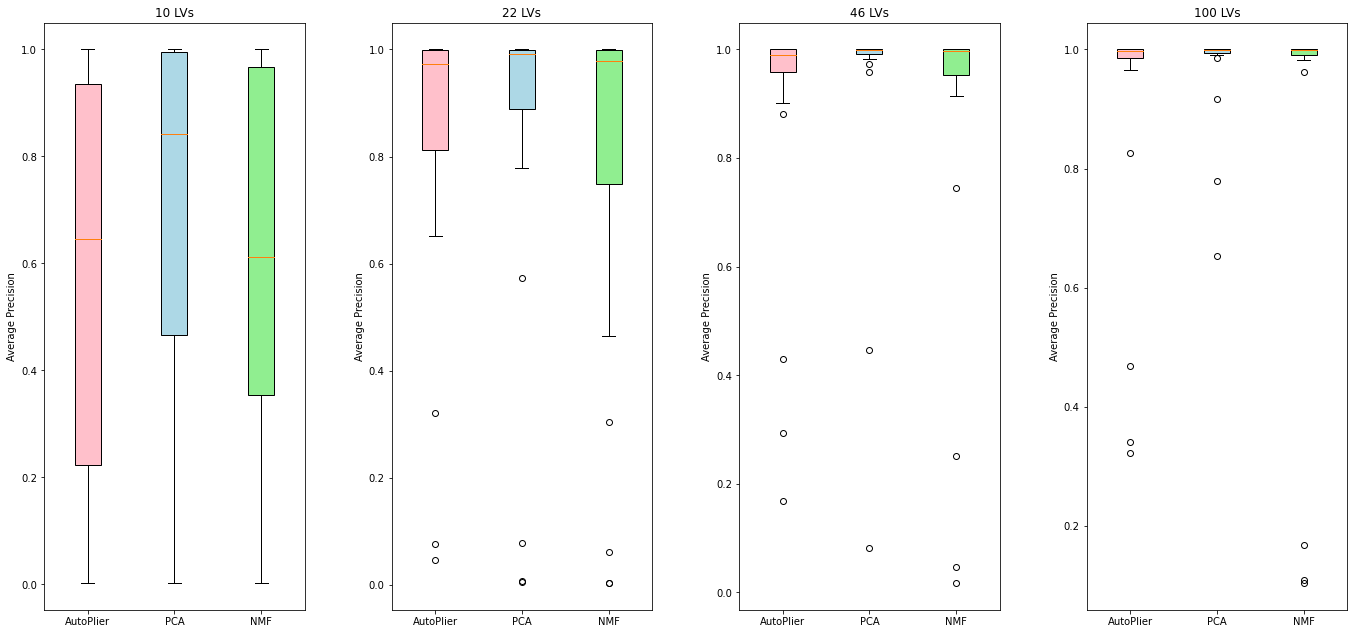

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))
colors = ['pink', 'lightblue', 'lightgreen']

for i in range(0,4):
    labels = ["AutoPlier","PCA","NMF"]
    data = []
    data += [reports_AP[i]["Average Precision"].values]
    data += [reports_PCA[i]["Average Precision"].values]
    data += [reports_NMF[i]["Average Precision"].values]

    bplot = ax[i].boxplot(data, labels = labels, widths=0.3, patch_artist=True)
    ax[i].set_title(str(n_LVs[i])+" LVs")
    ax[i].set_ylabel('Average Precision')
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
fig.tight_layout(pad=5.0)


In [81]:
times_df =pd.DataFrame(times)

In [89]:
times_df["PCA"]

0    6.081001
1    6.255002
2    6.785001
3    7.747002
Name: PCA, dtype: float64

Text(0.5, 0, 'N LVs')

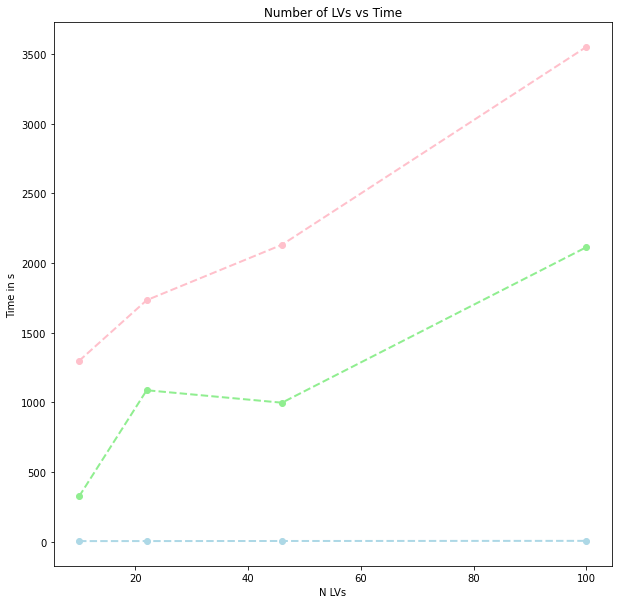

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
colors = ['pink', 'lightblue', 'lightgreen']
ax.plot(n_LVs[0:4],times_df["AutoPlier"].values , c = colors[0], marker='o', linestyle='dashed',linewidth=2, markersize=6)
ax.plot( n_LVs[0:4],times_df["PCA"].values, c = colors[1], marker='o', linestyle='dashed',linewidth=2, markersize=6)
ax.plot( n_LVs[0:4],times_df["NMF"].values, c = colors[2], marker='o', linestyle='dashed',linewidth=2, markersize=6)
ax.set_title("Number of LVs vs Time")
ax.set_ylabel('Time in s')
ax.set_xlabel('N LVs')